In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import sys
import os

os.environ['WINGHOME'] = '/usr/local/lib/wingpro8'
sys.path.append(os.getenv('WINGHOME'))

import wingdbstub
wingdbstub.Ensure()

# Accuracy and Gain Comparison (AGCO)

In [3]:
from gcpds.visualizations.accuracy import agco

Input data:

In [4]:
ticks = np.array(['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 
                   'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 
                   'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S30', 'S31', 
                   'S32', 'S33', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40', 'S41', 'S42', 
                   'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49', 'S50', 'S51', 'S52'])

method_1 = np.array([78.33, 50.  , 78.33, 81.67, 75.  , 74.07, 44.44, 55.  , 59.72,
                     53.33, 41.67, 58.49, 76.67, 93.33, 55.17, 61.67, 45.  , 63.33,
                     55.81, 76.  , 58.33, 61.67, 61.67, 58.33, 40.68, 73.33, 55.36,
                     64.41, 56.76, 68.33, 43.33, 53.33, 65.  , 71.19, 73.33, 41.38,
                     61.67, 40.  , 66.67, 50.  , 86.67, 65.  , 53.33, 77.78, 58.62,
                     78.33, 65.52, 73.33, 45.76, 60.])

method_2 = np.array([71.5, 58.5, 88.5, 86.2, 75.8, 63.3, 60.2, 54.8, 63.1, 76.5, 67. ,
                     65.4, 75.2, 93.5, 65.4, 58.5, 52.5, 65. , 57.9, 68.8, 83.8, 65.2,
                     85. , 70. , 63.5, 78.8, 54.1, 64.2, 62.8, 66.8, 54.8, 63.7, 78.8,
                     69.2, 77.8, 53.1, 63.7, 61.8, 71.8, 66. , 97. , 75.2, 57.7, 77.9,
                     67.7, 90.8, 72.8, 83. , 51.3, 69.5])

labels = ['CSP+LDA', 'GFC+WDCNN']

## Plot arguments

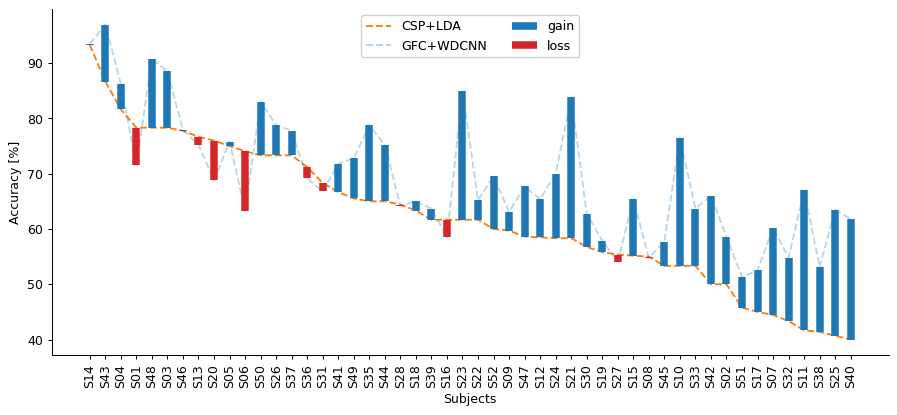

In [5]:
fig = agco(
    method_1, method_2, ticks, labels, sort='method_1', 
    
    # styles
    reference_c='C1', 
    gain_c='C0', 
    loss_c='C3', 
    barwidth=6, 
    
    # labels
    ylabel='Accuracy [%]', 
    xlabel='Subjects', 
    gain_labels=['gain', 'loss'], 
    
    # figure options
    size=(12, 5),
    fig=None,
    ax=None, 
    dpi=90,
)

fig;

## Reverse sort

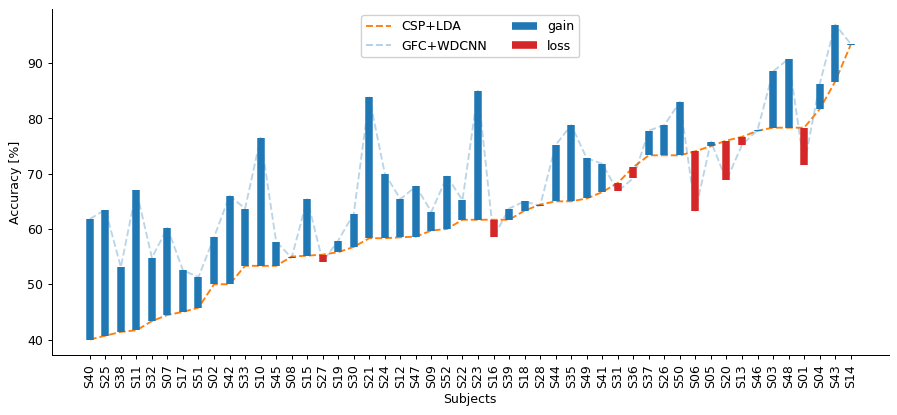

In [6]:
agco(method_1, method_2, ticks, labels, sort='method_1r', size=(12, 5));

## Subplots

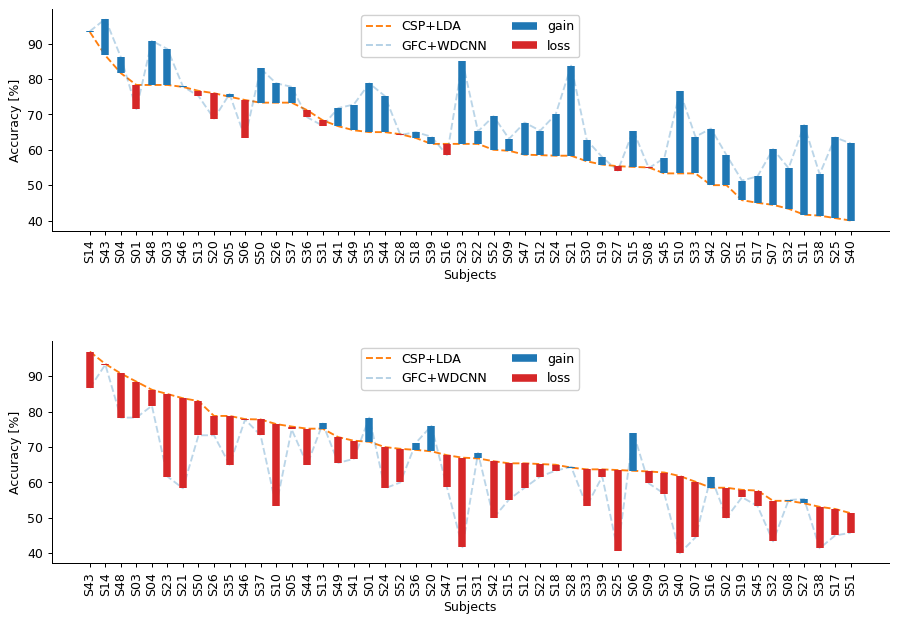

In [7]:
plt.figure(figsize=(12, 8), dpi=90)

ax1 = plt.subplot(211)
agco(method_1, method_2, ticks, labels, sort='method_1', ax=ax1, fig=plt.gcf())

ax2 = plt.subplot(212)
agco(method_1, method_2, ticks, labels, sort='method_2', ax=ax2, fig=plt.gcf())

plt.subplots_adjust(hspace=0.5)

## Plot modifications

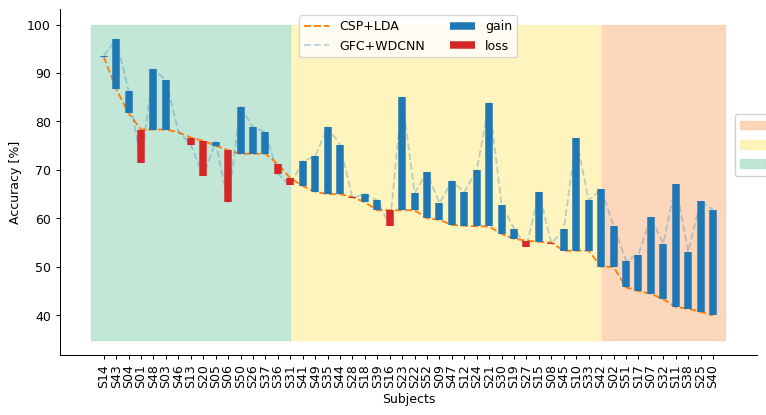

In [8]:
fig = agco(method_1, method_2, ticks, labels, sort='method_1', size=(10, 5))

pastel2 = plt.get_cmap('Pastel2')
f1 = plt.fill_betweenx([35, 100], 40, 50, color=pastel2(1), alpha=0.8, label='4444')
f2 = plt.fill_betweenx([35, 100], 15, 40, color=pastel2(5), alpha=0.8)
f3 = plt.fill_betweenx([35, 100], -1, 15, color=pastel2(0), alpha=0.8)
l2 = plt.legend([f1, f2, f3], ["2%", '3%', '5%'], loc=4, ncol=1, bbox_to_anchor =(1.07, 0.5))

plt.gca().add_artist(l2);

## All gains]

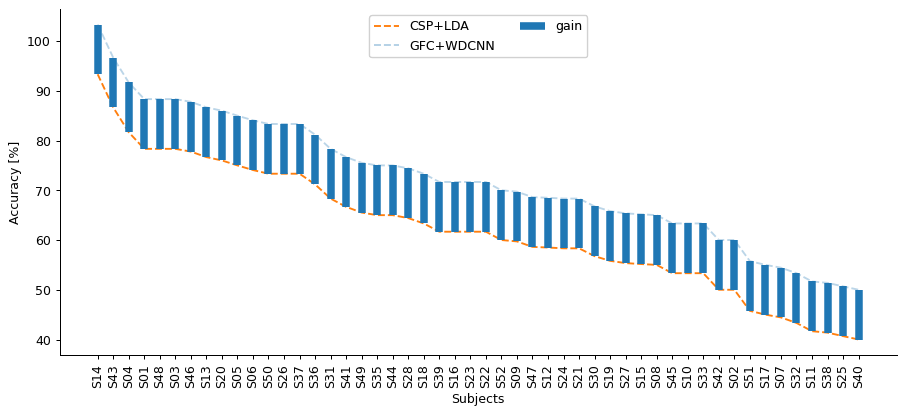

In [10]:
agco(method_1, method_1+10, ticks, labels, sort='method_1', size=(12, 5));

## All loss

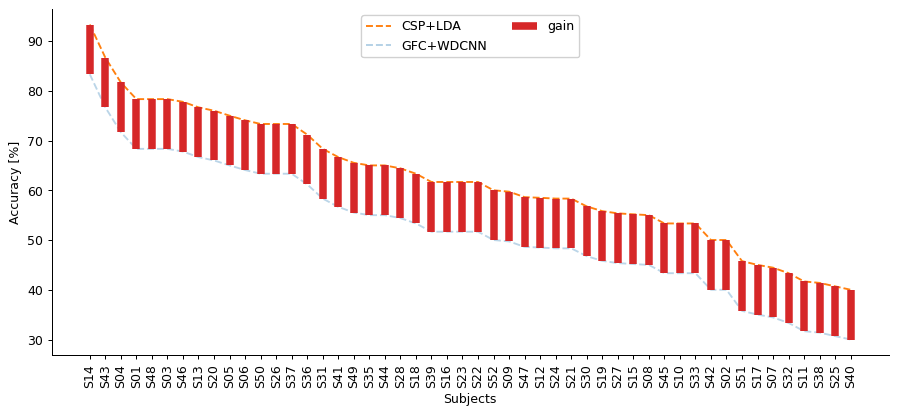

In [11]:
agco(method_1, method_1-10, ticks, labels, sort='method_1', size=(12, 5));